<div style="text-align: left;"><img src="https://i.imgur.com/BC2sAdw.png" align="left" width="200" title="Universiteit Leiden"/ ></div>

<font color='#0C2577'><b>Improving the age at onset estimation for Huntington’s Disease using Machine Learning models on top of the Enroll-HD data</b></font>

<left><font color='#0C2577'>JC Marchiori Dias – BioInformatics Master Thesis 2023/2024 - Notebook 2</font></left> 

<left><font color='#0C2577'>Leiden University - LUMC BioSemantics Group</font></left>

#### Import Libraries

In [1]:
## Importing Relevant Python Libraries

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import methods.HD_AAO_Estim_Improv_Methods as aao


#### Options for the notebook

In [2]:
## Set options for pandas
# to have better/more output from lists/dataframes

pd.options.display.max_rows = 100
pd.set_option('display.max_columns', None)

#### Group Features Definition

In [3]:
## Grouping of different features provided by Enroll-HD

patient_features =  ['caghigh', 'caglow', 'parenthd_impFill', 'region_impFill', 'parentagesx_impFill', 'sex', 'race',
                     'handed_impFill', 'weight_filled_impFill', 'height_filled_impFill']

others = ['rtrddur_filled_impFill', 'age', 'cap_score', 'bmi_new_impFill', 'packy_impFill', 'hxpacky_impFill',
          'cUHDRS', 'alcab_filled_impFill', 'tobyos_impFill', 'tobcpd_impFill', 'patient_alive_impFill']

under_eval = ['tobab_filled_impFill']

lifestyle_features = ['isced_filled_impFill', 'maristat_filled_impFill', 'res_filled_impFill', 'jobclas_filled_impFill',
                      'emplnrsn_filled_impFill', 'nmdrg_filled_impFill', 'nmdrgfrq_filled_impFill', 'cafab_filled_impFill',
                      'cafpd_filled_impFill', 'hxalcab_filled_impFill', 'alcunits_filled_impFill', 'hxtobab_filled_impFill',
                      'hxtobcpd_impFill', 'hxtobyos_impFill']

assessm_features = ['pbashalsm_1', 'pbashalsm_2', 'pbashalsm_3', 'pbashalsm_4', 'pbashalsm_5', 'pbasaptsv_impFill',
'pbasdelfr_impFill', 'pbashalsv_impFill', 'pbashalfr_impFill', 'swrt_impFill', 'sbh7_impFill', 'scnt_impFill',
'pbasaptfr_impFill', 'ccvab_impFill', 'pbasirrsv_impFill', 'ccdep_impFill', 'ccpsy_impFill', 'cccog_impFill', 
'sit_impFill', 'carelevl_impFill', 'ccapt_impFill', 'sdmt_impFill', 'finances_impFill', 'pbasaggfr_impFill',
'pbasocsv_impFill', 'ccpob_impFill', 'occupatn_impFill', 'ccirb_impFill', 'adl_impFill', 'pbaspersv_impFill',
'pbasirrfr_impFill', 'pbasocfr_impFill', 'pbasperfr_impFill', 'emplusl_impFill', 'verflt_impFill', 'pbassidsv_impFill', 
'pbasdepfr_impFill', 'pbasaggsv_impFill', 'pbasdelsv_impFill', 'emplany_impFill', 'verfct_impFill', 'chores_impFill', 
'pbasdepsv_impFill', 'pbasanxfr_impFill', 'pbasanxsv_impFill', 'drive_impFill', 'fafinan_impFill', 'bed_impFill',
'pbassidfr_impFill', 'toilet_impFill', 'pbasdisbsv_impFill', 'bathe_impFill', 'sbh_filled_impFill', 
'housewrk_impFill', 'trnchair_impFill', 'supchild_impFill', 'volunt_impFill', 'laundry_impFill', 'grocery_impFill',
'dress_impFill', 'pbasdisbfr_impFill', 'pubtrans_impFill', 'walknbr_impFill', 'cash_impFill', 'prepmeal_impFill',
'comb_impFill', 'telephon_impFill', 'ownmeds_impFill', 'feedself_impFill', 'walkhelp_impFill', 'int1_filled_impFill',
'chorrle_impFill', 'sacvelh_impFill', 'chorlle_impFill', 'carehome_impFill', 'chorrue_impFill', 'chorlue_impFill', 
'dystlle_impFill', 'dystrle_impFill', 'sacvelv_impFill', 'hxsid_impFill', 'rdcwk_filled_impFill', 'sacinitv_impFill', 
'sacinith_impFill', 'walkfall_impFill', 'dystlue_impFill', 'prosupr_impFill', 'dystrue_impFill', 'ocularh_impFill',
'ocularv_impFill', 'prosupl_impFill', 'fingtapl_impFill', 'fingtapr_impFill', 'gait_impFill', 'rigarml_impFill', 
'dysarth_impFill', 'rigarmr_impFill', 'gen1_impFill', 'chorbol_impFill', 'brady_impFill', 'dysttrnk_impFill', 
'chorface_impFill', 'tandem_impFill', 'tongue_impFill', 'chortrnk_impFill', 'retropls_impFill', 'pbainfo_impFill',
'verfct5_impFill', 'indepscl_impFill', 'scnt1_impFill', 'sdmt1_impFill', 'luria_impFill', 'swrt1_impFill', 'sit1_impFill',
'sxmajor_sym_impFill', 'verflt05_impFill', 'verfct6_impFill', 'verflt07_impFill', 'verflt06_impFill', 'sit2_impFill',
'scnt3_impFill', 'sit3_impFill', 'sdmt2_impFill', 'scnt2_impFill', 'swrt3_impFill', 'swrt2_impFill', 'verfct7_impFill',
'ccmtr_impFill']

score_features = ['motscore_impFill', 'tfcscore_impFill', 'fascore_impFill', 'depscore_new_impFill', 
'irascore_new_impFill', 'psyscore_new_impFill', 'aptscore_new_impFill', 'exfscore_new_impFill']

onset_features = ['ccmtrage', 'sxsubj', 'sxfam', 'hddiagn', 'sxrater', 'sxgs', 'sxgsdy', 'ccdepage', 'ccirbage', 'ccvabage', 
'ccaptage', 'ccpobage', 'ccpsyage', 'cccogage']

study_features = ['patient_num', 'subjid', 'studyid', 'year_seq', 'visdy', 'hdcat_0', 'hdcat_l', 'hdcat_impFill', 
'evtnum_filled', 'diagconf_impFill']

reduced_features = ['age', 'caghigh', 'parentagesx_impFill', 'nmdrgfrq_filled_impFill', 'maristat_filled_impFill',
                    'emplnrsn_filled_impFill', 'alcunits_filled_impFill']

In [4]:
## Variable categorization of different features provided by Enroll-HD

bool_cols = ["alcab_filled", "bathe", "bed", "cafab_filled", "cafpd_filled", "carehome", "cash", "ccapt", "cccog", "ccdep", "ccirb",
                 "ccmtr", "ccpob", "ccpsy", "ccvab", "comb", "dress", "drive", "emplany", "emplusl", "fafinan", "feedself", "gen1",
                 "grocery", "housewrk", "hxalcab_filled", "hxsid", "hxtobab_filled", "laundry", "nmdrg_filled", "ownmeds", "parenthd",
                 "patient_alive", "pbashalsm_1", "pbashalsm_2", "pbashalsm_3", "pbashalsm_4", "pbashalsm_5", "prepmeal", "pubtrans",
                 "rdcwk_filled", "sbh_filled", "sbh7", "scnt", "sdmt", "sit", "supchild", "swrt", "telephon", "tobab_filled", "toilet",
                 "trl", "trnchair", "verfct", "verflt", "volunt", "walkfall", "walkhelp", "walknbr"]  # 59 Boolean columns

catg_cols = ["handed", "res_filled", "jobclas_filled", "maristat_filled", "race", "pbainfo", "emplnrsn_filled", "sxmajor_sym",
                 "hdcat", "hdcat_0", "hdcat_l", "region", "sex", "studyid"]  # 14 Categorical columns

ordn_cols = ["adl", "brady", "carelevl", "chorbol", "chores", "chorface", "chorlle", "chorlue", "chorrle", "chorrue",
                 "chortrnk", "diagconf", "dysarth", "dystlle", "dystlue", "dystrle", "dystrue", "dysttrnk", "finances", "fingtapl",
                 "fingtapr", "gait", "indepscl", "int1_filled", "isced_filled", "luria", "nmdrgfrq_filled", "occupatn", "ocularh", "ocularv", "pbasaggfr",
                 "pbasaggsv", "pbasanxfr", "pbasanxsv", "pbasaptfr", "pbasaptsv", "pbasdelfr", "pbasdelsv", "pbasdepfr", "pbasdepsv",
                 "pbasdisbfr", "pbasdisbsv", "pbashalfr", "pbashalsv", "pbasirrfr", "pbasirrsv", "pbasocfr", "pbasocsv", "pbasperfr",
                 "pbaspersv", "pbassidfr", "pbassidsv", "prosupl", "prosupr", "retropls", "rigarml", "rigarmr", "sacinith", "sacinitv",
                 "sacvelh", "sacvelv", "year_seq", "tandem", "tongue"]  # 64 Categorical Ordinal columns // 'seq' is changed to the new version: 'year_seq'

numr_cols = ["age", "alcunits_filled", "aptscore_new", "bmi_new", "caghigh", "caglow",  "ccaptage", "cccogage", "ccdepage",
                 "ccirbage", "ccmtrage", "ccpobage", "ccpsyage", "ccvabage", "depscore_new", "evtnum_filled", "exfscore_new", "fascore",
                 "fiscore", "height_filled", "hxpacky", "hxtobcpd", "hxtobyos", "irascore_new", "miscore", "motscore", "packy",
                 "parentagesx", "psyscore_new", "rtrddur_filled", "scnt1", "scnt2", "scnt3", "sdmt1", "sdmt2", "sit1", "sit2", "sit3",
                 "swrt1", "swrt2", "swrt3", "tfcscore", "tobcpd", "tobyos", "trla1", "trla2", "trla3", "trlb1", "trlb2", "trlb3",
                 "verfct5", "verfct6", "verfct7", "verflt05", "verflt06", "verflt07", "visdy", "weight_filled"]  # 58 Numeric columns

intg_cols = ["age", "aptscore_new", "caghigh", "caglow", "ccaptage", "cccogage", "ccdepage", "ccirbage", "ccmtrage", "ccpobage",
                 "ccpsyage", "ccvabage", "depscore_new", "evtnum_filled", "exfscore_new", "fascore", "fiscore", "hxtobcpd", "hxtobyos", "irascore_new",
                 "miscore", "motscore", "parentagesx", "psyscore_new", "rtrddur_filled", "scnt1", "scnt2", "scnt3", "sdmt1", "sdmt2", "sit1", "sit2", "sit3",
                 "swrt1", "swrt2", "swrt3", "tfcscore", "tobcpd", "tobyos", "trla1", "trla2", "trla3", "trlb1", "trlb2", "trlb3", "verfct5", "verfct6",
                 "verfct7", "verflt05", "verflt06", "verflt07", "visdy"]  # 52 integer columns --> subset of numeric columns



#### Loading Dataset

In [5]:
## Import of pre-processed and imputed data, created by LUMC BioSemantics Group
# Enroll-HD dataset is available after the associated Consortium evaluation and approval, therefore this data cannot be 
# found elsewhere and its location here is private. 

hd_imputed_df = pd.read_csv("~/Study/HD/my_project/hd_workflow_data/data_output/aao_feature_all/imputed_dfs/New_All_cases.csv", index_col="patient_num")

#### Feature Analysis - Target HDDiagn

In [6]:
## Patients considered genetic carrier

feat_model_df = hd_imputed_df[(hd_imputed_df['caghigh'] >= 35)]

In [7]:
## Only manifested patients that were enrolled as pre-manifested

feat_model_df = feat_model_df[(feat_model_df['hdcat_l'] == 3.0) & 
                              (feat_model_df['hdcat_0'] == 2.0) &
                              (feat_model_df['hdcat_impFill'] == 3.0)]

feat_model_df['hddiagn'].fillna(feat_model_df['ccmtrage'], inplace=True)
feat_model_df['hddiagn'].fillna(feat_model_df['sxrater'], inplace=True)
feat_model_df['hddiagn'].fillna(feat_model_df['sxfam'], inplace=True)
feat_model_df['hddiagn'].fillna(feat_model_df['sxsubj'], inplace=True)

In [8]:
## Create Study Dataset (from PostProcessed training Stage1 file)
## Target: hddiagn

target_pp = ['hddiagn']
columns_pp = patient_features + lifestyle_features

feat_model_df = feat_model_df.groupby('subjid').first()[target_pp + columns_pp]
feat_model_df = feat_model_df.reset_index()
feat_model_df.dropna(subset = ['hddiagn'], inplace=True)
feat_model_df

,subjid,hddiagn,caghigh,caglow,parenthd_impFill,region_impFill,parentagesx_impFill,sex,race,handed_impFill,weight_filled_impFill,height_filled_impFill,isced_filled_impFill,maristat_filled_impFill,res_filled_impFill,jobclas_filled_impFill,emplnrsn_filled_impFill,nmdrg_filled_impFill,nmdrgfrq_filled_impFill,cafab_filled_impFill,cafpd_filled_impFill,hxalcab_filled_impFill,alcunits_filled_impFill,hxtobab_filled_impFill,hxtobcpd_impFill,hxtobyos_impFill
0,1347826,68.0,41,15,1.0,3,59.0,1,0.0,0.0,68.0,167.0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2593663,53.0,42,20,1.0,3,60.0,0,0.0,0.0,80.0,178.0,4.0,2.0,3.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5033118,57.0,43,23,1.0,3,43.0,0,0.0,0.0,73.0,183.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,8.0,0.0,0.0,0.0
3,5796487,49.0,42,18,1.0,3,65.0,0,0.0,0.0,68.0,170.0,1.0,3.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0,18.0,20.0
4,5895058,45.0,45,25,1.0,1,50.0,0,0.0,0.0,79.4,170.0,5.0,3.0,3.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,20.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,988755452,43.0,41,19,1.0,3,54.0,0,0.0,0.0,75.0,180.0,3.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
885,995587389,39.0,48,18,1.0,1,32.0,0,0.0,0.0,69.9,177.8,3.0,0.0,2.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,21.0
886,996268693,43.0,46,22,1.0,3,55.0,0,0.0,0.0,71.1,180.0,5.0,2.0,2.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,25.0,1.0,12.0,16.0
887,996629325,53.0,42,17,1.0,3,60.0,0,0.0,0.0,75.5,182.0,5.0,2.0,2.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,16.0,0.0,0.0,0.0


In [9]:
## Execute Feature Selection using 3 different Models (SelectKBest, Mutual Information and Lasso)

fs_results_sk, fs_results_mi, fs_results_ls = aao.select_features(feat_model_df, target_pp, columns_pp)

## Percentage Calculation and Agregation of results

fs_results_sk['Select KBest'] = (fs_results_sk['score']*100/fs_results_sk['score'].sum())
fs_results_mi['Mutual Information'] = (fs_results_mi['score']*100/fs_results_mi['score'].sum())
fs_results_ls['Lasso'] = (fs_results_ls['score']*100/fs_results_ls['score'].sum())

fs_results_sk['Cumulative Select KBest'] = fs_results_sk['Select KBest'].cumsum()
fs_results_mi['Cumulative Mutual Information'] = fs_results_mi['Mutual Information'].cumsum()
fs_results_ls['Cumulative Lasso'] = fs_results_ls['Lasso'].cumsum()

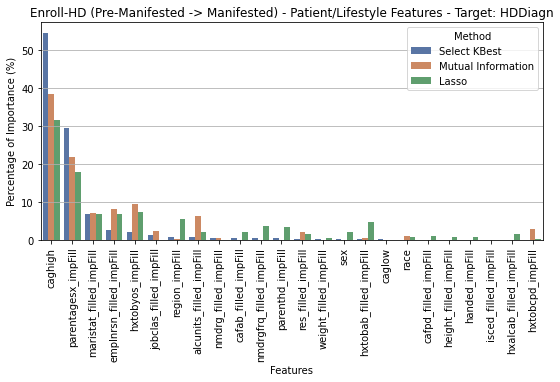

In [10]:
## Graph showing the feature selection results

res1 = pd.merge(fs_results_sk, fs_results_mi, on=['feature'])
res2 = pd.merge(res1, fs_results_ls, on=['feature'])
res2 = res2.drop(columns=['target_x', 'score_x', 'target_y', 'score_y', 'target', 'score'])
res3 = pd.melt(res2[['feature','Select KBest', 'Mutual Information', 'Lasso']], id_vars = "feature")
res3.rename(columns={"variable": "Method"}, inplace=True)
                   
fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.barplot(data=res3, x="feature", y="value", hue='Method', palette="deep")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Importance (%)')
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Patient/Lifestyle Features - Target: HDDiagn')
plt.grid(axis='y')
plt.show()

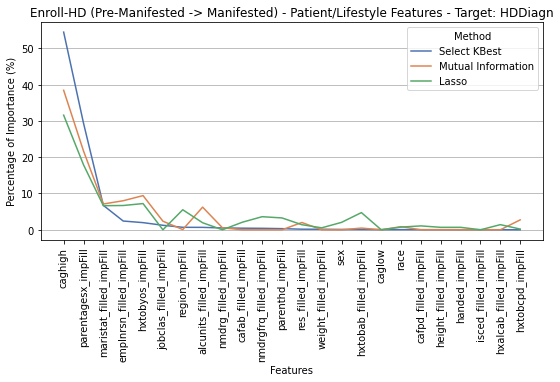

In [11]:
## Graph showing the feature selection results

res1 = pd.merge(fs_results_sk, fs_results_mi, on=['feature'])
res2 = pd.merge(res1, fs_results_ls, on=['feature'])
res2 = res2.drop(columns=['target_x', 'score_x', 'target_y', 'score_y', 'target', 'score'])
res3 = pd.melt(res2[['feature','Select KBest', 'Mutual Information', 'Lasso']], id_vars = "feature")
res3.rename(columns={"variable": "Method"}, inplace=True)

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.lineplot(data=res3, x="feature", y="value", hue='Method', palette="deep")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Importance (%)')
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Patient/Lifestyle Features - Target: HDDiagn')
plt.grid(axis='y')
plt.show()

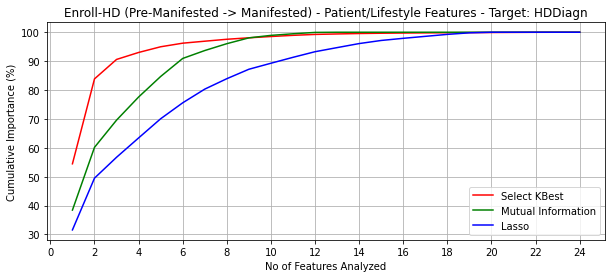

In [12]:
## Graph showing the feature selection results

runs = range(1, len(fs_results_sk)+1)

plt.figure(figsize = (10,4))
plt.plot(runs, fs_results_sk['Cumulative Select KBest'], 'r', label='Select KBest')  
plt.plot(runs, fs_results_mi['Cumulative Mutual Information'], 'g', label='Mutual Information')  
plt.plot(runs, fs_results_ls['Cumulative Lasso'], 'b', label='Lasso')  

plt.ylabel('Cumulative Importance (%)')
plt.xlabel('No of Features Analyzed')
plt.xticks(range(0,len(fs_results_sk)+1,2))
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Patient/Lifestyle Features - Target: HDDiagn')
plt.grid()
plt.legend()
plt.show()

#### Models Analysis - Target HDDiagn

In [13]:
## Try different Models (using same random seed each run)
# Only Penetrant range of the disease was used.

# Parameters
ml_runs = 50
cag_min = 40
cag_max = 61
target = 'hddiagn'
NNparams = [100, 10, 2]

# Identify Categorical Features
num_columns_pp = []
cat_columns_pp = []

for i in fs_results_sk['feature'].values:
    if i in catg_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in catg_cols:
        cat_columns_pp.append(i)
    elif i in ordn_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in ordn_cols:
        cat_columns_pp.append(i)        
    else:
        num_columns_pp.append(i)      
        
cols = [num_columns_pp, cat_columns_pp]

# Execute the Evaluation
rf, gb, ab, cb, nn, rf_res, gb_res, ab_res, cb_res, nn_res  = aao.tryAllModels(feat_model_df, ml_runs, cols, target, cag_min, cag_max, NNparams)

# Print Results
print("\nFeedForward Neural Network mean results after", ml_runs, "runs:\n", nn)
print("\nRandom Forest mean results after", ml_runs, "runs:\n", rf)
print("\nAdaBoost mean results after", ml_runs, "runs:\n", ab)
print("\nCatBoost mean results after", ml_runs, "runs:\n", cb)
print("\nGradientBoosting mean results after", ml_runs, "runs:\n", gb)


Execution no 1 using seed value 2404038253
6/6 [==============================] - 0s 1ms/step
Execution no 2 using seed value 3926824903
6/6 [==============================] - 0s 1ms/step
Execution no 3 using seed value 1101425837
6/6 [==============================] - 0s 1ms/step
Execution no 4 using seed value 3530373884
6/6 [==============================] - 0s 1ms/step
Execution no 5 using seed value 4120668149
6/6 [==============================] - 0s 1ms/step
Execution no 6 using seed value 715782095
6/6 [==============================] - 0s 1ms/step
Execution no 7 using seed value 4145667497
6/6 [==============================] - 0s 1ms/step
Execution no 8 using seed value 1833564730
6/6 [==============================] - 0s 1ms/step
Execution no 9 using seed value 3981481639
6/6 [==============================] - 0s 1ms/step
Execution no 10 using seed value 3925479359
6/6 [==============================] - 0s 1ms/step
Execution no 11 using seed value 2175096710
6/6 [===========

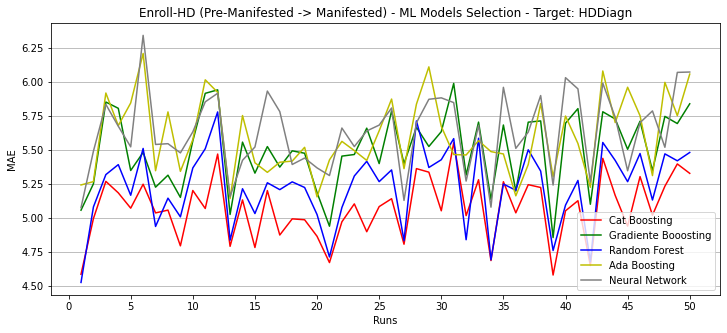

In [14]:
## MAE Graph - Models Evaluation

mae_r = []
for i in range(len(rf_res)): mae_r.append(rf_res[i][0])
mae_g = []
for i in range(len(gb_res)): mae_g.append(gb_res[i][0])
mae_n = []
for i in range(len(nn_res)): mae_n.append(nn_res[i][0])
mae_a = []
for i in range(len(ab_res)): mae_a.append(ab_res[i][0])
mae_c = []
for i in range(len(cb_res)): mae_c.append(cb_res[i][0])   
runs = range(1, len(rf_res)+1)

plt.figure(figsize = (12,5))
plt.plot(runs, mae_c, 'r', label='Cat Boosting')  
plt.plot(runs, mae_g, 'g', label='Gradiente Booosting')
plt.plot(runs, mae_r, 'b', label='Random Forest')
plt.plot(runs, mae_a, 'y', label='Ada Boosting')
plt.plot(runs, mae_n, color='gray', label='Neural Network')

plt.title('Enroll-HD (Pre-Manifested -> Manifested) - ML Models Selection - Target: HDDiagn')
plt.ylabel('MAE')
plt.xlabel('Runs')
plt.xticks(range(0,len(rf_res)+1,5))
plt.legend()
plt.grid(axis='y')
plt.show()

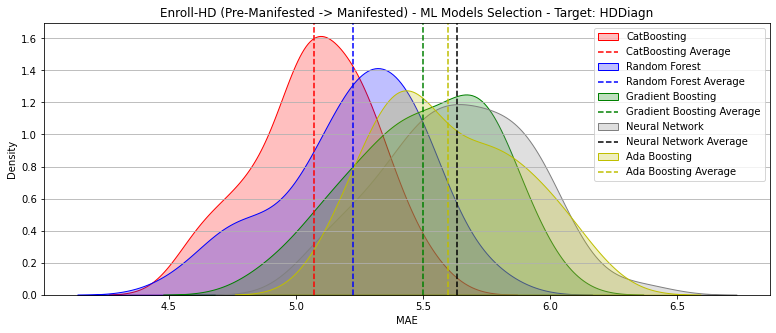

In [15]:
## MAE Graph - Models Evaluation

cb_df = pd.DataFrame(cb_res, columns=['mae', 'rmse', 'r2'])
gb_df = pd.DataFrame(gb_res, columns=['mae', 'rmse', 'r2'])
ab_df = pd.DataFrame(ab_res, columns=['mae', 'rmse', 'r2'])
rf_df = pd.DataFrame(rf_res, columns=['mae', 'rmse', 'r2'])
nn_df = pd.DataFrame(nn_res, columns=['mae', 'rmse', 'r2'])

fig, ax = plt.subplots(1, 1, figsize=(13,5))

sns.kdeplot(cb_df, x="mae", color='r', ax=ax, label='CatBoosting', fill=True)
plt.axvline(np.nanmean(mae_c), 0,9, color='r', linestyle='--', label='CatBoosting Average')
sns.kdeplot(rf_df, x="mae", color='b',ax=ax, label='Random Forest', fill=True)
plt.axvline(np.nanmean(mae_r), 0,9, color='b', linestyle='--', label='Random Forest Average')
sns.kdeplot(gb_df, x="mae", color='g',ax=ax, label='Gradient Boosting', fill=True)
plt.axvline(np.nanmean(mae_g), 0,9, color='g', linestyle='--', label='Gradient Boosting Average')
sns.kdeplot(nn_df, x="mae", color='gray',ax=ax, label='Neural Network', fill=True)
plt.axvline(np.nanmean(mae_n), 0,9, color='black', linestyle='--', label='Neural Network Average')
sns.kdeplot(ab_df, x="mae", color='y',ax=ax, label='Ada Boosting', fill=True)
plt.axvline(np.nanmean(mae_a), 0,9, color='y', linestyle='--', label='Ada Boosting Average')

plt.xlabel('MAE')
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - ML Models Selection - Target: HDDiagn')
plt.legend()
plt.grid(axis='y')
plt.show()


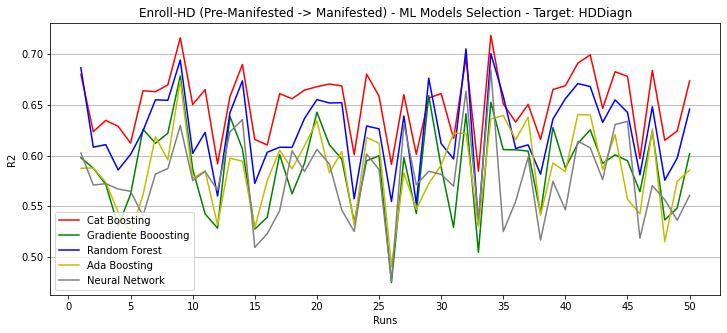

In [16]:
## R2 Graph - Models Evaluation

r2_r = []
for i in range(len(rf_res)): r2_r.append(rf_res[i][2])
r2_g = []
for i in range(len(gb_res)): r2_g.append(gb_res[i][2])
r2_n = []
for i in range(len(nn_res)): r2_n.append(nn_res[i][2])
r2_a = []
for i in range(len(ab_res)): r2_a.append(ab_res[i][2])
r2_c = []
for i in range(len(cb_res)): r2_c.append(cb_res[i][2])   
runs = range(1, len(rf_res)+1)

plt.figure(figsize = (12,5))
plt.plot(runs, r2_c, 'r', label='Cat Boosting')  
plt.plot(runs, r2_g, 'g', label='Gradiente Booosting')
plt.plot(runs, r2_r, 'b', label='Random Forest')
plt.plot(runs, r2_a, 'y', label='Ada Boosting')
plt.plot(runs, r2_n, color='gray', label='Neural Network')

plt.title('Enroll-HD (Pre-Manifested -> Manifested) - ML Models Selection - Target: HDDiagn')
plt.ylabel('R2')
plt.xlabel('Runs')
plt.xticks(range(0,len(rf_res)+1,5))
plt.grid(axis='y')
plt.legend()
plt.show()

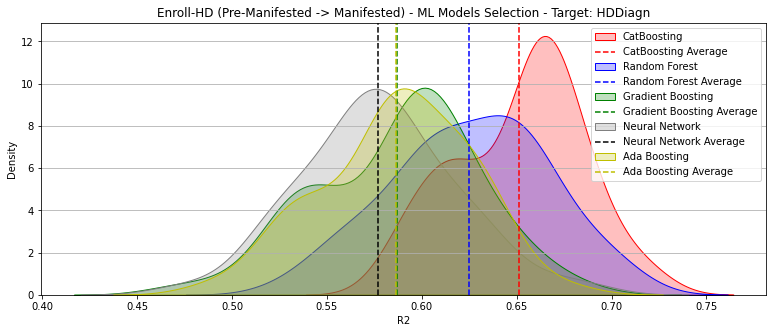

In [17]:
## R2 Graph - Models Evaluation

cb_df = pd.DataFrame(cb_res, columns=['mae', 'rmse', 'r2'])
gb_df = pd.DataFrame(gb_res, columns=['mae', 'rmse', 'r2'])
ab_df = pd.DataFrame(ab_res, columns=['mae', 'rmse', 'r2'])
rf_df = pd.DataFrame(rf_res, columns=['mae', 'rmse', 'r2'])
nn_df = pd.DataFrame(nn_res, columns=['mae', 'rmse', 'r2'])

fig, ax = plt.subplots(1, 1, figsize=(13,5))
sns.kdeplot(cb_df, x="r2", color='r', ax=ax, label='CatBoosting', fill=True)
plt.axvline(np.nanmean(r2_c), 0,9, color='r', linestyle='--', label='CatBoosting Average')
sns.kdeplot(rf_df, x="r2", color='b',ax=ax, label='Random Forest', fill=True)
plt.axvline(np.nanmean(r2_r), 0,9, color='b', linestyle='--', label='Random Forest Average')
sns.kdeplot(gb_df, x="r2", color='g',ax=ax, label='Gradient Boosting', fill=True)
plt.axvline(np.nanmean(r2_g), 0,9, color='g', linestyle='--', label='Gradient Boosting Average')
sns.kdeplot(nn_df, x="r2", color='gray',ax=ax, label='Neural Network', fill=True)
plt.axvline(np.nanmean(r2_n), 0,9, color='black', linestyle='--', label='Neural Network Average')
sns.kdeplot(ab_df, x="r2", color='y',ax=ax, label='Ada Boosting', fill=True)
plt.axvline(np.nanmean(r2_a), 0,9, color='y', linestyle='--', label='Ada Boosting Average')

plt.xlabel('R2')
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - ML Models Selection - Target: HDDiagn')
plt.legend()
plt.grid(axis='y')
plt.show()


#### Feature Impact over Models - Target HDDiagn

In [13]:
## Evaluating the adition of features one by one
# Over CatBoosting and NeuralNetwork.
# Only Penetrant range of the disease was used.

# Parameters
ml_runs = 30
scale = 1
NNparams = [100, 10, 2]
eval_cb_feat = []
eval_nn_feat = []
cag_min = 40
cag_max = 61
runOneHotEnc = 1
target = 'hddiagn'
count = 0
empty_df = pd.DataFrame()

# Identify Categorical Features and loop over each feature
num_columns_pp = []
cat_columns_pp = []

for i in fs_results_ls['feature'].values:
    if i in catg_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in catg_cols:
        cat_columns_pp.append(i)
    elif i in ordn_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in ordn_cols:
        cat_columns_pp.append(i)        
    else:
        num_columns_pp.append(i)               

    cols = [num_columns_pp, cat_columns_pp]
    
    count = count+1
    print ("Running models to added feature:", count, i)
    
    # Execute Evaluation
    cb_fs1, nn_fs1, cb_res_fs1, nn_res_fs1, _, _, _, _, _, _ = aao.tryTwoModels(feat_model_df, ml_runs, cols, target, cag_min, cag_max, NNparams, runOneHotEnc, empty_df)

    # Print Summary
    print("\nFeedForward Neural Network mean results after", ml_runs, "runs:\n", nn_fs1)
    print("\nCatBoost mean results after", ml_runs, "runs:\n", cb_fs1)
    
    # Append Results
    eval_cb_feat.append([i, float(round(cb_res_fs1[0][0],3)), 
                         float(round(cb_res_fs1[0][1],3)), 
                         float(round(cb_res_fs1[0][2],3))])
    
    eval_nn_feat.append([i, float(round(nn_res_fs1[0][0],3)), 
                         float(round(nn_res_fs1[0][1],3)), 
                         float(round(nn_res_fs1[0][2],3))])   

Running models to added feature: 1 caghigh
Total Patients: 845
6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
        MAE      RMSE        R2
0  5.74366  7.476056  0.545916

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  5.667854  7.387708  0.556116
Running models to added feature: 2 parentagesx_impFill
Total Patients: 845
6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.458472  7.019396  0.593552

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  5.444958  6.945414  0.601996
Running models to added feature: 3 hxtobyos_impFill
Total Patients: 845
6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE       R2
0  5.498957  7.135262  0.58384

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0

6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.292194  6.787883  0.610609

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  5.054544  6.452341  0.647666
Running models to added feature: 11 sex
Total Patients: 845
6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.214791  6.721348  0.625597

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  4.928619  6.313318  0.669325
Running models to added feature: 12 alcunits_filled_impFill
Total Patients: 845
6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.390142  6.902231  0.609748

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  5.043514  6.457795  0.659147
Running models to added feature: 13

6/6 [==============================] - 0s 992us/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.560107  7.143218  0.569717

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  5.151361  6.603234  0.630949
Running models to added feature: 20 hxtobcpd_impFill
Total Patients: 845
6/6 [==============================] - 0s 985us/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.451849  7.034326  0.594729

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  4.972467  6.385901  0.664583
Running models to added feature: 21 caglow
Total Patients: 845
6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.550092  7.069635  0.581596

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  5.104543  6.507026  0.645161
Running models to added feature: 22

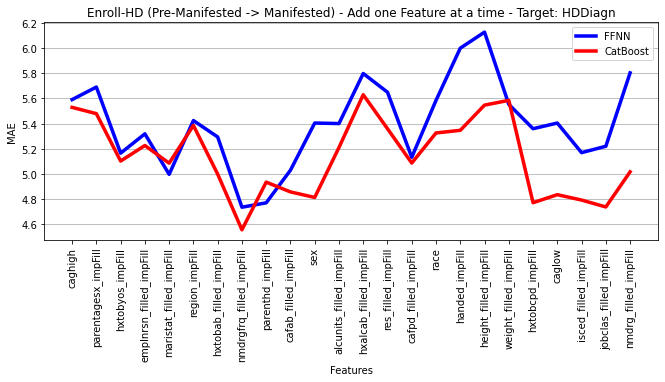

In [28]:
## MAE Graph for the Evaluating about the adition of features one by one

feat_imp_nn = pd.DataFrame(data=np.array(eval_nn_feat), columns=['feature', 'mae', 'rmse', 'r2'])
feat_imp_cb = pd.DataFrame(data=np.array(eval_cb_feat), columns=['feature', 'mae', 'rmse', 'r2'])

fig, axs = plt.subplots(1, 1, figsize=(11,4))

sns.lineplot(data=feat_imp_nn, x="feature", y=feat_imp_nn['mae'].astype(float), linewidth = 3.5, color='blue', label='FFNN')
sns.lineplot(data=feat_imp_cb, x="feature", y=feat_imp_cb['mae'].astype(float), linewidth = 3.5, color='red', label='CatBoost')

plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('MAE')
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Add one Feature at a time - Target: HDDiagn')
plt.grid(axis='y')
plt.legend()
plt.show()

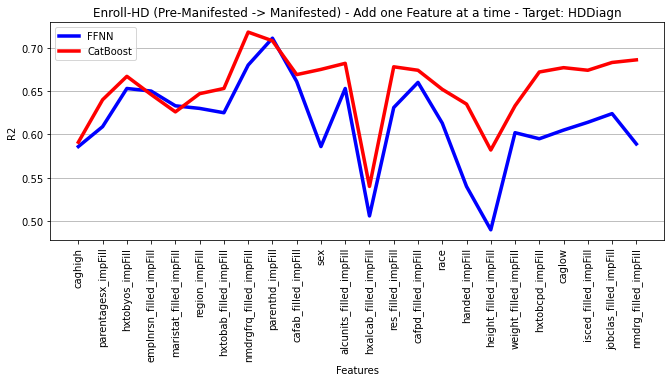

In [29]:
## R2 Graph for the Evaluating about the adition of features one by one

feat_imp_nn = pd.DataFrame(data=np.array(eval_nn_feat), columns=['feature', 'mae', 'rmse', 'r2'])
feat_imp_cb = pd.DataFrame(data=np.array(eval_cb_feat), columns=['feature', 'mae', 'rmse', 'r2'])

fig, axs = plt.subplots(1, 1, figsize=(11,4))

sns.lineplot(data=feat_imp_nn, x="feature", y=feat_imp_nn['r2'].astype(float), linewidth = 3.5, color='blue', label='FFNN')
sns.lineplot(data=feat_imp_cb, x="feature", y=feat_imp_cb['r2'].astype(float), linewidth = 3.5, color='red', label='CatBoost')

plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('R2')
plt.title('Enroll-HD (Pre-Manifested -> Manifested) - Add one Feature at a time - Target: HDDiagn')
plt.grid(axis='y')
plt.legend()
plt.show()

## -----------------------------------------------------------------